In [6]:
import scipy.fft
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from scipy import signal
import json
import os
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter, filtfilt

In [52]:
def myfft(y):
    N = len(y)
    T = 1.0 / 100.0
    x = np.linspace(0.0, N*T, N)
    y_f = scipy.fft.fft(y)
    x_f = np.linspace(0.0, 1.0/(2.0*T), N//2)
    #plt.plot(x_f, 2.0/N * np.abs(y_f[:N//2]))
    #plt.show()
    return x_f,2.0/N * np.abs(y_f[:N//2])

In [62]:
total = 0
fft_list = []
freq_x = []
def FileDFS(root_path):
    current_branch = os.listdir(root_path)
    json_file_count = 0
    if len(current_branch) == 0: return json_file_count
    for dir in os.listdir(root_path):
        current_path = f'{root_path}\{dir}'
        if os.path.isdir(current_path):
            json_file_count += FileDFS(current_path)
        if os.path.isfile(current_path):
            if '.json' in dir:
                if ('WS' in current_path) :
                    global total
                    df = pd.read_json(current_path)
                    y = df.RightFootAcc.z  #ACC X Y Z
                    if len(y) == 0:
                        total = total + 1
                    # if len(y) < 700 or  len(y) > 15000:
                    #     continue
                    
                    x,fft_y = myfft(y[10:])
                    path_split = current_path.split('\\')
                    freq_x.append(x[:len(x)])
                    fft_list.append(fft_y[:len(x)])
                    json_file_count += 1
    return json_file_count

n = FileDFS('c.台南立人里')
#csvfile.close()
print(total,n)

0 295


295
102 2780


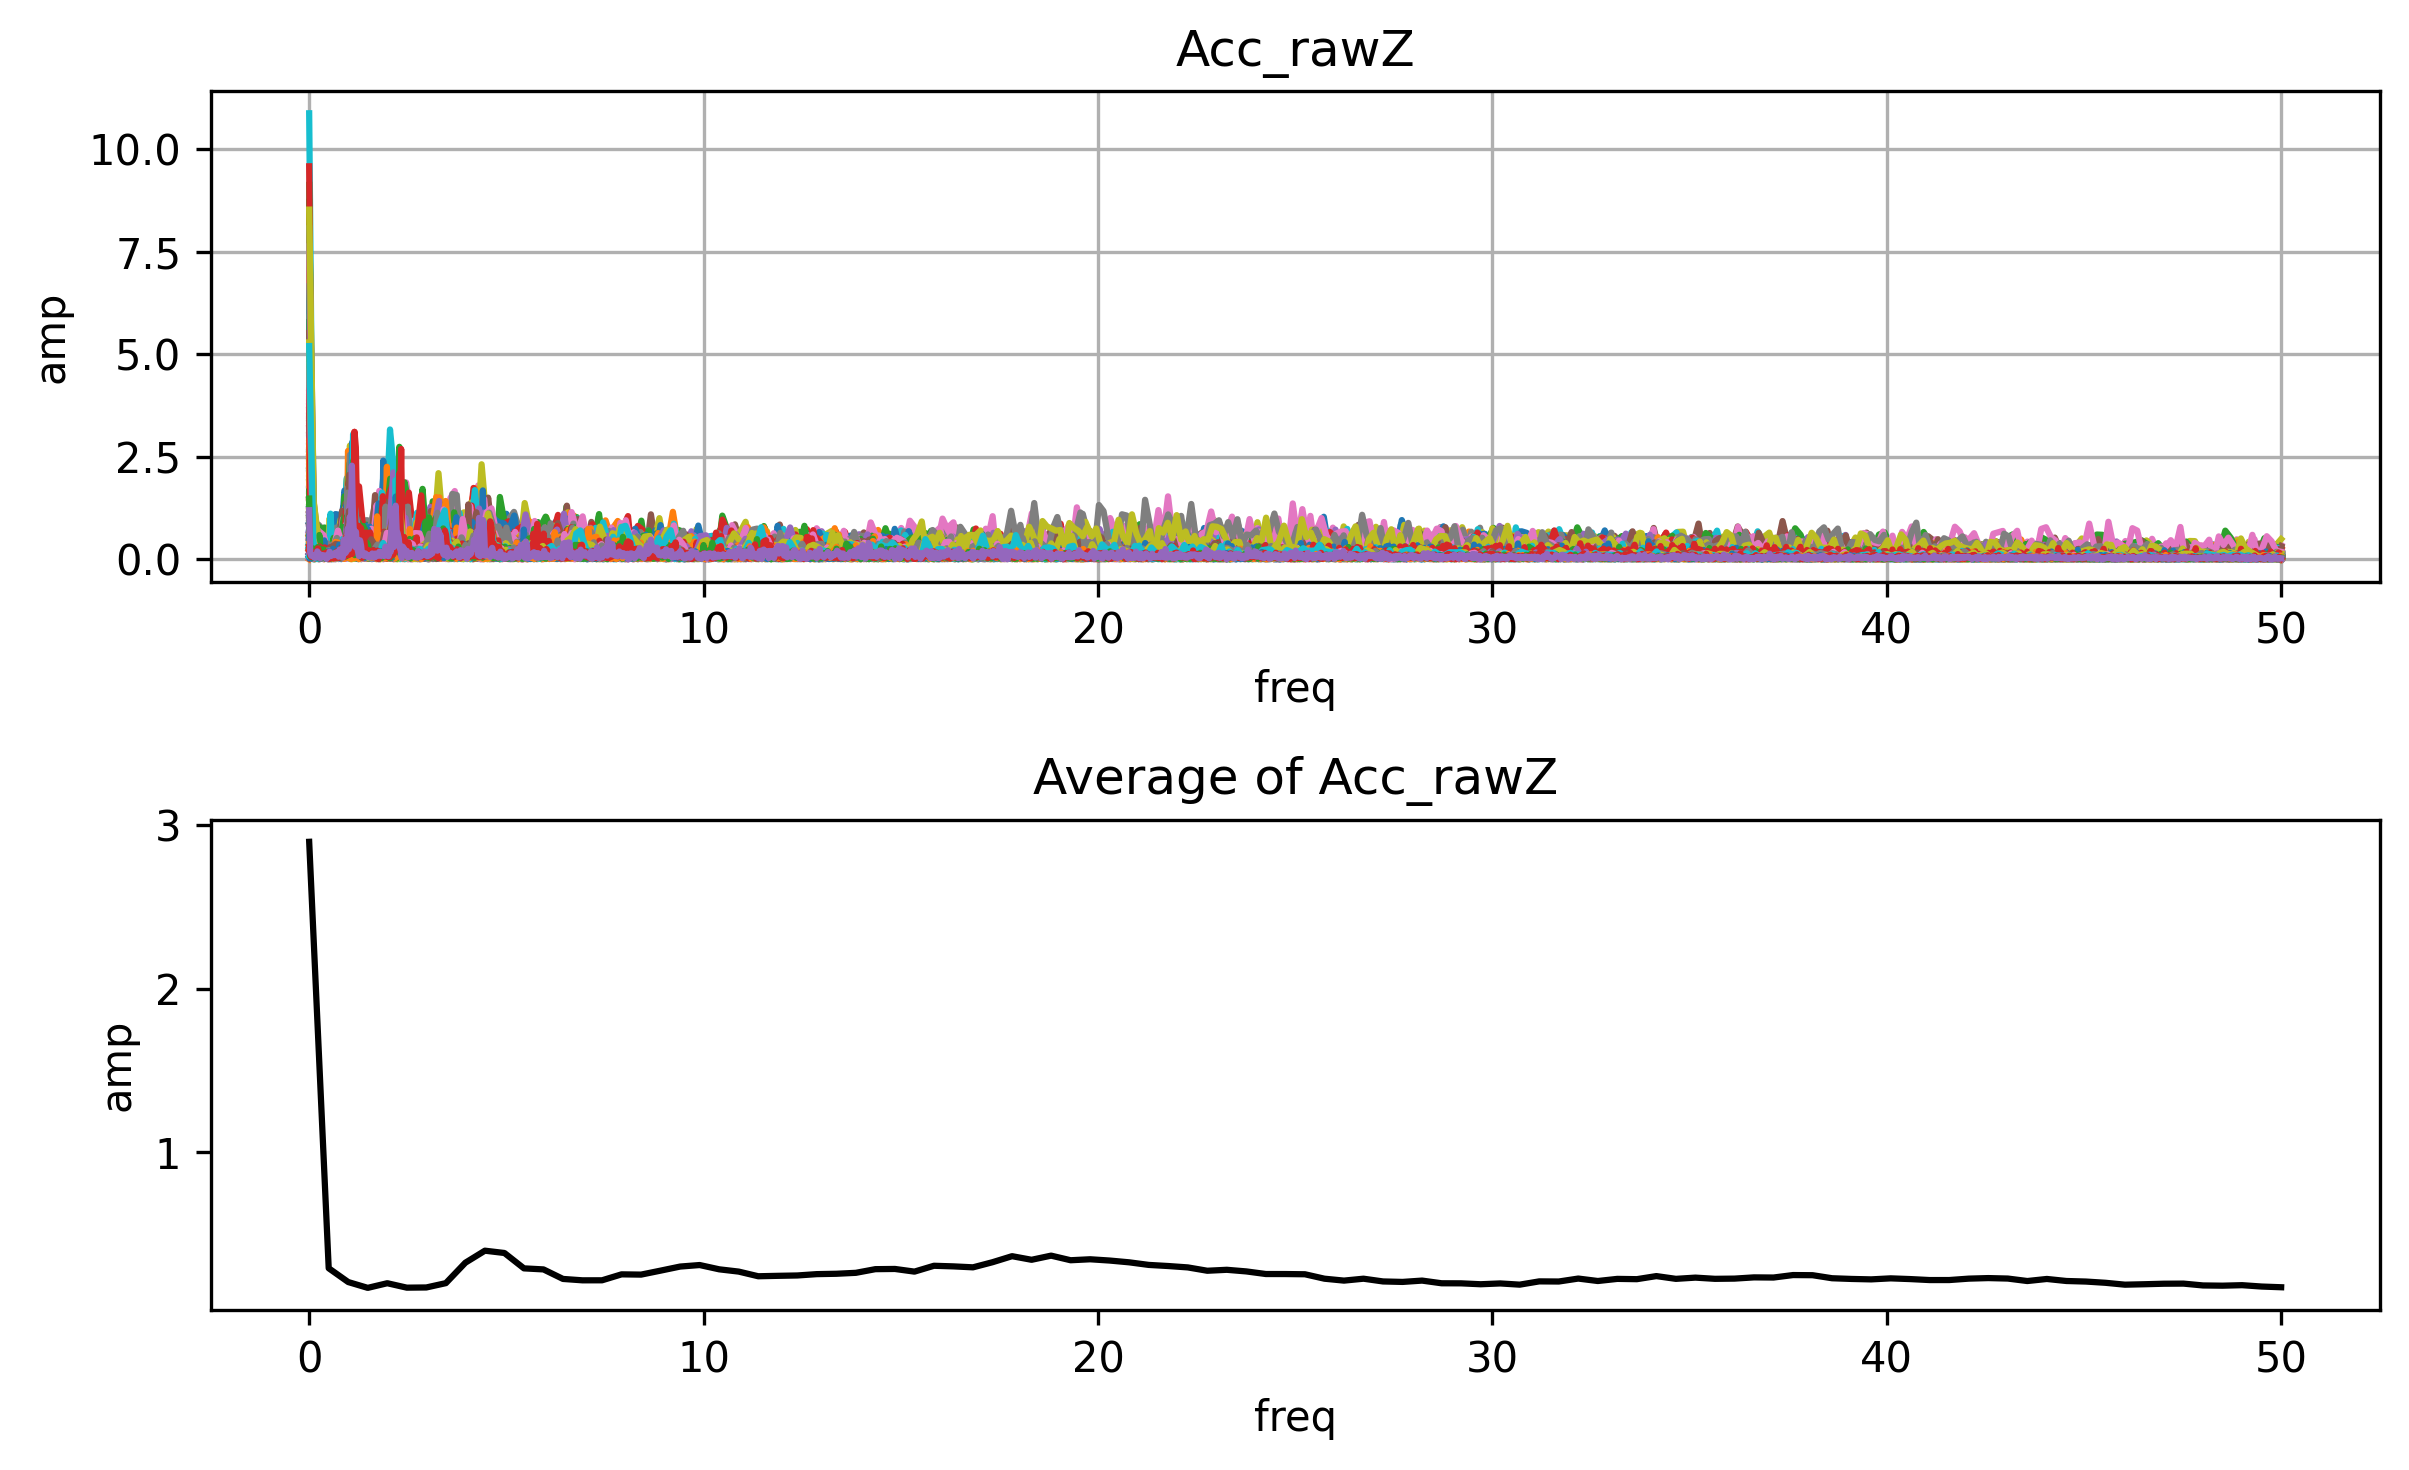

In [63]:

print(len(fft_list))

min_l = np.min([len(x) for x in freq_x])
max_l = np.max([len(x) for x in freq_x])
print(min_l,max_l)
yy = [ y[:min_l]for y in fft_list]
mfft_list = np.mean(yy,axis=0)

x = []
for xx in freq_x:
    if len(xx) == min_l:
        x = xx
plt.figure(figsize=(8,5),dpi=300)
plt.subplot(211)
for i in range(len(fft_list)):
    #if np.max(fft_list[i]) >= 30:
    #    continue
    plt.plot(freq_x[i],fft_list[i],'-')
plt.grid()
plt.xlabel('freq')
plt.ylabel('amp')
plt.title('Acc_rawZ')   #改
plt.subplot(212)
plt.plot(x,mfft_list,'k-')
plt.xlabel('freq')
plt.ylabel('amp')
plt.title('Average of Acc_rawZ')    #改
plt.tight_layout()
plt.show()